<a href="https://colab.research.google.com/github/yodair1/data_credit_analysis/blob/main/Data_Credit_Analysis_EBAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Credit Analysis**

# 1 - Exploring the Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/' + \
 'ebac-course-utils/develop/dataset/credito.csv',
 na_values='na'
)

In [3]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [4]:
df.shape

(10127, 16)

In [5]:
df[df['default']==0].shape

(8500, 16)

In [6]:
df[df['default']==1].shape

(1627, 16)

In [7]:
total, _ = df.shape
compliant, _ = df[df['default']==0].shape
defaulter, _ = df[df['default']==1].shape

print(f"The percentage of compliant clients is {round(100*compliant/total,2)}%")
print(f"The percentage of defaulter clients is {round(100*defaulter/total,2)}%")

The percentage of compliant clients is 83.93%
The percentage of defaulter clients is 16.07%


In [8]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [9]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [10]:
df.drop('id',axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### Missing Data

In [11]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [26]:
def stats_missing_data (df: pd.DataFrame)->None:
  missing = []
  for col in df.columns:
    if df[col].isna().any() == True:
      mis, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_missing = {col: {
        'Number of Missing Data:': mis,
        'Percentage of Missing Data:': round(100 * mis / total, 2)
      }}
      missing.append(dict_missing)
  for stat in missing:
    print(stat)

In [27]:
stats_missing_data(df)

{'escolaridade': {'Number of Missing Data:': 1519, 'Percentage of Missing Data:': 15.0}}
{'estado_civil': {'Number of Missing Data:': 749, 'Percentage of Missing Data:': 7.4}}
{'salario_anual': {'Number of Missing Data:': 1112, 'Percentage of Missing Data:': 10.98}}


In [30]:
stats_missing_data(df[df['default']==0])

{'escolaridade': {'Number of Missing Data:': 1263, 'Percentage of Missing Data:': 14.86}}
{'estado_civil': {'Number of Missing Data:': 620, 'Percentage of Missing Data:': 7.29}}
{'salario_anual': {'Number of Missing Data:': 925, 'Percentage of Missing Data:': 10.88}}


In [31]:
stats_missing_data(df[df['default']==1])

{'escolaridade': {'Number of Missing Data:': 256, 'Percentage of Missing Data:': 15.73}}
{'estado_civil': {'Number of Missing Data:': 129, 'Percentage of Missing Data:': 7.93}}
{'salario_anual': {'Number of Missing Data:': 187, 'Percentage of Missing Data:': 11.49}}


## Data Cleaning

In [35]:
df[['limite_credito','valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [39]:
def fn(valor: str) -> float:
  return float(valor.replace(".","").replace(",","."))

In [41]:
df['limite_credito'] = df['limite_credito'].apply(fn)
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df[['limite_credito','valor_transacoes_12m']].dtypes

limite_credito          float64
valor_transacoes_12m    float64
dtype: object

In [43]:
df[['limite_credito','valor_transacoes_12m']].head()

,limite_credito,valor_transacoes_12m
0,12691.51,1144.90
1,8256.96,1291.45
2,3418.56,1887.72
3,3313.03,1171.56
4,4716.22,816.08


### Removing Missing Data

In [44]:
df.dropna(inplace=True)

In [45]:
df.shape

(7081, 16)

In [48]:
df[df['default']==0].shape

(5968, 16)

In [47]:
df[df['default']==1].shape

(1113, 16)

In [49]:
total, _ = df.shape
compliant, _ = df[df['default']==0].shape
defaulter, _ = df[df['default']==1].shape

print(f"The new percentage of compliant clients is {round(100*compliant/total,2)}%")
print(f"The new percentage of defaulter clients is {round(100*defaulter/total,2)}%")

The new percentage of compliant clients is 84.28%
The new percentage of defaulter clients is 15.72%


## Data Visualization

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

In [51]:
df_compliant = df[df['default']==0]
df_defaulter = df[df['default']==1]

### Categorical Visualization

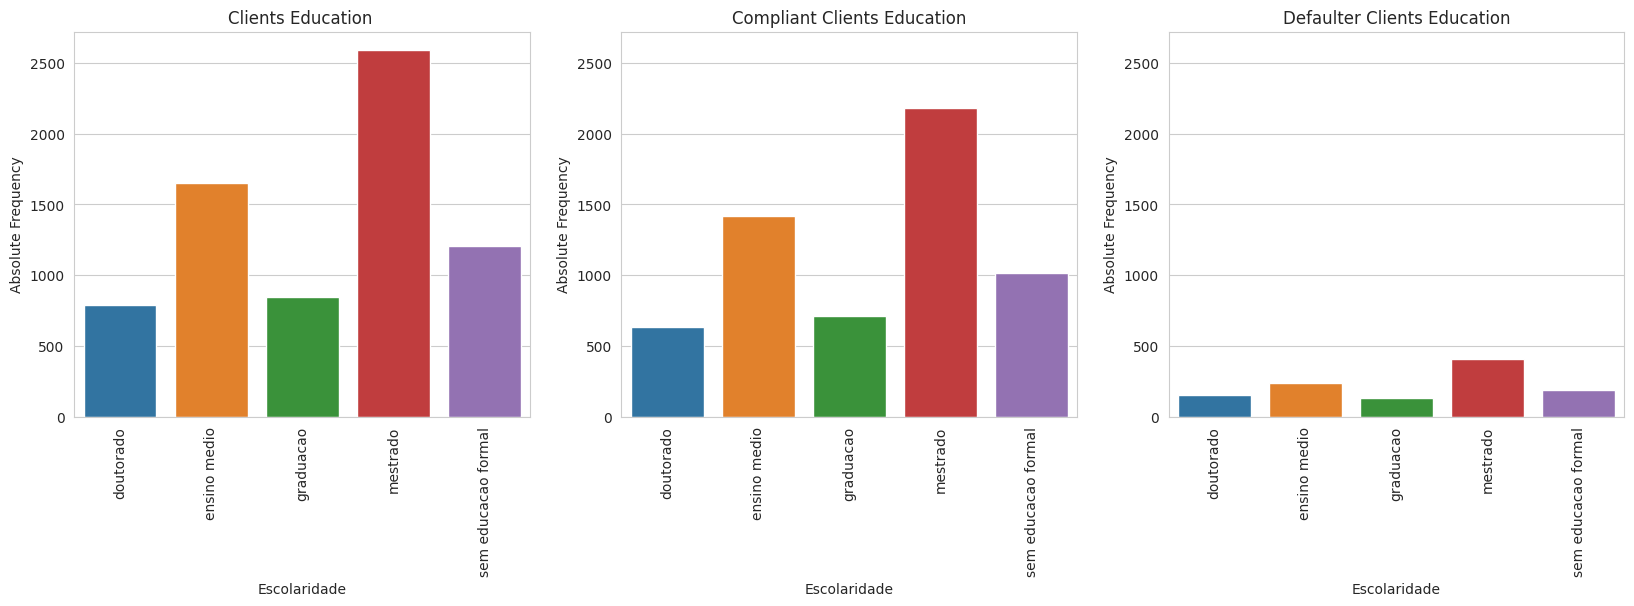

In [72]:
column = 'escolaridade'
titles = [
 'Clients Education ',
 'Compliant Clients Education',
 'Defaulter Clients Education'
]

eixo = 0
max_y = 0
figure, axes = plt.subplots(1,3,figsize=(20,5),sharex = True)

for dataframe in [df,df_compliant,df_defaulter]:

  df_to_plot = dataframe[column].value_counts().to_frame()
  df_to_plot.rename(columns={column: 'absolute_freq'}, inplace=True)
  df_to_plot[column] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[column], inplace=True)

  f = sns.barplot(x = df_to_plot[column],
                  y = df_to_plot['absolute_freq'],
                  ax = axes[eixo])
  f.set(title = titles[eixo],
        xlabel = column.capitalize(),
        ylabel = 'Absolute Frequency')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

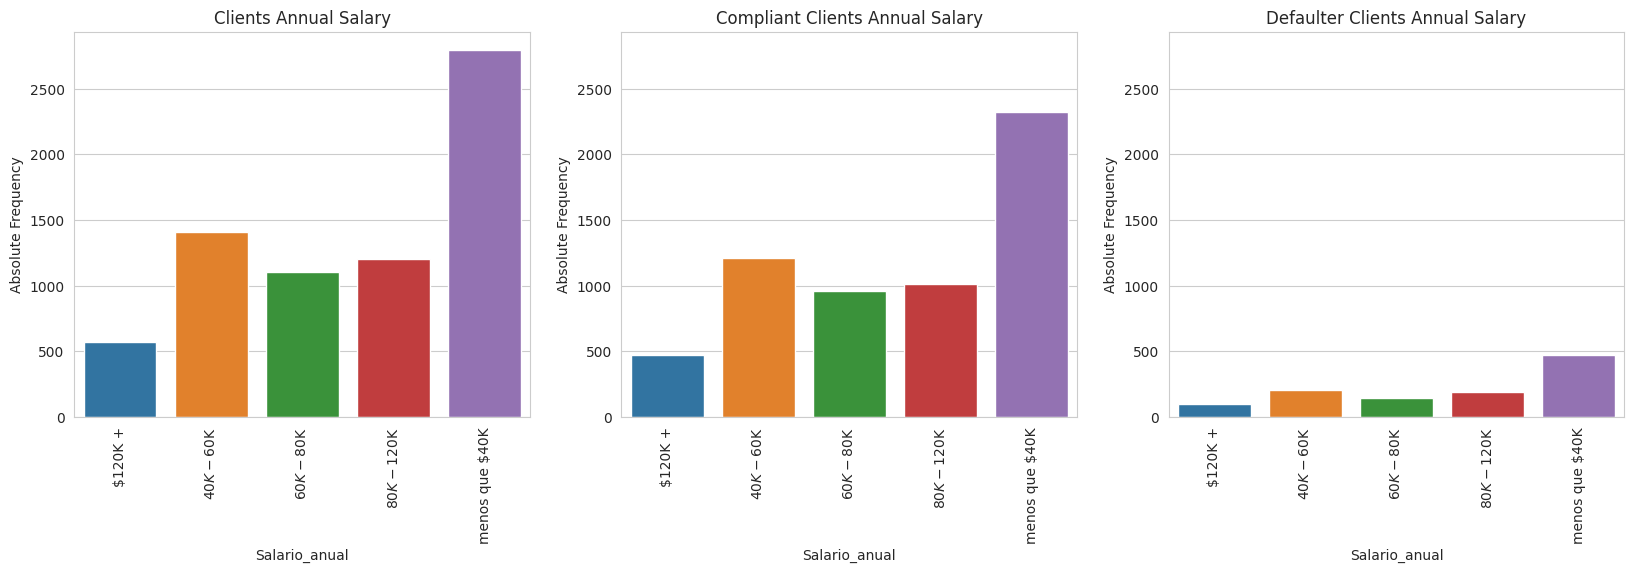

In [77]:
column = 'salario_anual'
titles = [
 'Clients Annual Salary',
 'Compliant Clients Annual Salary',
 'Defaulter Clients Annual Salary'
]

eixo = 0
max_y = 0
figure, axes = plt.subplots(1,3,figsize=(20,5),sharex = True)

for dataframe in [df,df_compliant,df_defaulter]:

  df_to_plot = dataframe[column].value_counts().to_frame()
  df_to_plot.rename(columns={column: 'absolute_freq'}, inplace=True)
  df_to_plot[column] = df_to_plot.index
  df_to_plot.reset_index(inplace=True, drop=True)
  df_to_plot.sort_values(by=[column], inplace=True)

  f = sns.barplot(x = df_to_plot[column],
                  y = df_to_plot['absolute_freq'],
                  ax = axes[eixo])
  f.set(title = titles[eixo],
        xlabel = column.capitalize(),
        ylabel = 'Absolute Frequency')
  f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1

Here, the education and annual salary does not seem to make a big difference in the client being defaulter or compliant. We should make other visualizations in order to get more insights, and to determine which variables are most correlated with the risk of being defaulter.

### Numerical Visualization

In [74]:
df.drop(['id', 'default'], axis=1).select_dtypes('number').head(n=5)

,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,3,39,5,3,1,12691.51,1144.90,42
1,49,5,44,6,2,1,8256.96,1291.45,33
2,51,3,36,4,0,1,3418.56,1887.72,20
4,40,3,21,5,0,1,4716.22,816.08,28
5,44,2,36,3,2,1,4010.69,1088.07,24


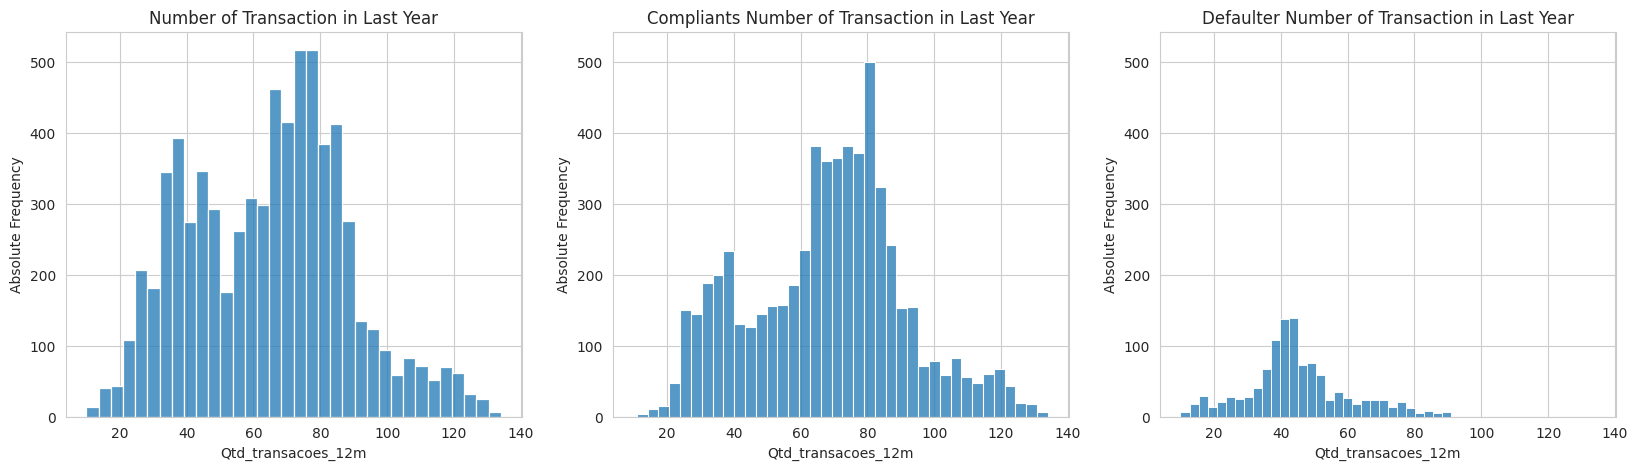

In [76]:
column = 'qtd_transacoes_12m'
titles = [
 'Number of Transaction in Last Year',
 'Compliants Number of Transaction in Last Year',
 'Defaulter Number of Transaction in Last Year'
]
eixo = 0
max_y = 0
figura, axes = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_compliant, df_defaulter]:
  f = sns.histplot(x=column, data=dataframe, stat='count', ax=axes[eixo])
  f.set(
  title=titles[eixo],
  xlabel=column.capitalize(),
  ylabel='Absolute Frequency'
  )
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1
figura.show()

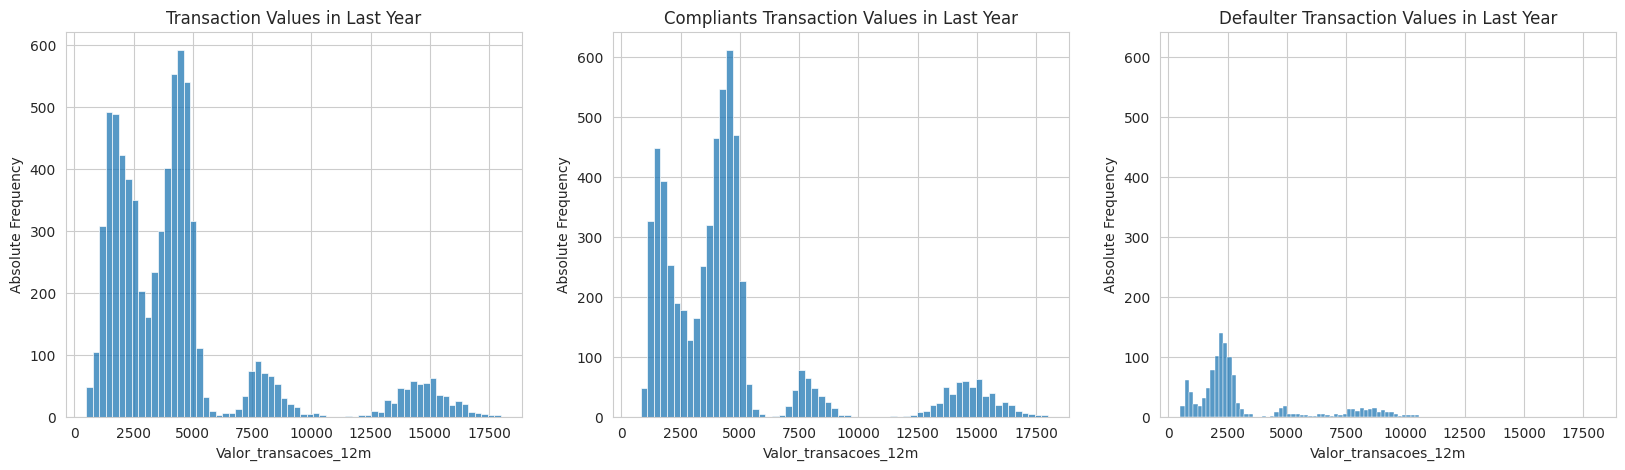

In [78]:
column = 'valor_transacoes_12m'
titles = [
 'Transaction Values in Last Year',
 'Compliants Transaction Values in Last Year',
 'Defaulter Transaction Values in Last Year'
]
eixo = 0
max_y = 0
figura, axes = plt.subplots(1,3, figsize=(20, 5), sharex=True)
for dataframe in [df, df_compliant, df_defaulter]:
  f = sns.histplot(x=column, data=dataframe, stat='count', ax=axes[eixo])
  f.set(
  title=titles[eixo],
  xlabel=column.capitalize(),
  ylabel='Absolute Frequency'
  )
  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))
  eixo += 1
figura.show()

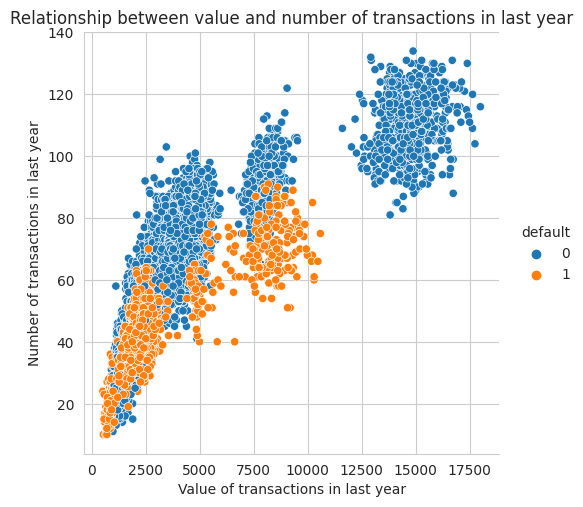

In [87]:
f = sns.relplot(
    data=df,
    x="valor_transacoes_12m", y="qtd_transacoes_12m",
    hue = 'default'
)

f.set(
    title = 'Relationship between value and number of transactions in last year',
    xlabel = 'Value of transactions in last year',
    ylabel = 'Number of transactions in last year'
)

In [89]:
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

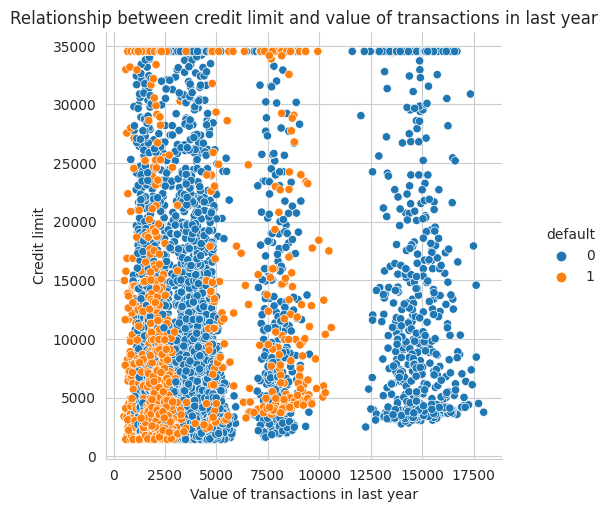

In [94]:
f = sns.relplot(
    data=df,
    x="valor_transacoes_12m", y="limite_credito",
    hue = 'default'
)

f.set(
    title = 'Relationship between credit limit and value of transactions in last year',
    xlabel = 'Value of transactions in last year',
    ylabel = 'Credit limit'
)

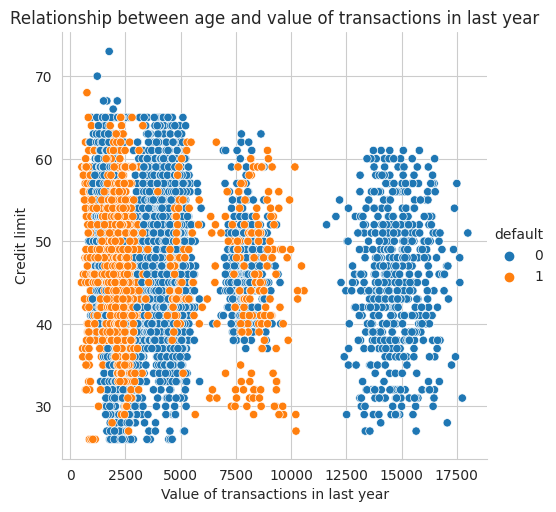

In [98]:
f = sns.relplot(
    data=df,
    x="valor_transacoes_12m", y="idade",
    hue = 'default'
)

f.set(
    title = 'Relationship between age and value of transactions in last year',
    xlabel = 'Value of transactions in last year',
    ylabel = 'Credit limit'
)

By the graphs provided, we can see that the group with bigger risk of being defaulter are those that have the value of transactions in the last year around 2500, and ohter group concentrated between 7500 and 10000.

The number of transactions and credit limit does not seem to have great correlation with the risk of being defaulter.

But is interesting to see that there is a great risk of people with around 5000-1000 in value of transactions in last year and below 35 years of age being defaulters. In the last graph that is made clear, with  almost all the people in this group being defaulters.

As we can also see, people that have value of transactions in last year above 10000 represent almost risk zero of being defaulters.